In [1]:
## Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
## Read the Data
df = pd.read_csv("hotel_bookings.csv")
df.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22


In [3]:
## Get Information About The Data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
## Data Preparation

In [4]:
## Finding the Percentage Of Missing values

for col in df.columns:
    pct_missing =  df[col].isna().sum()*100/len(df)
    print("{} - {}%".format(col,pct_missing))
    

hotel - 0.0%
is_canceled - 0.0%
lead_time - 0.0%
arrival_date_year - 0.0%
arrival_date_month - 0.0%
arrival_date_week_number - 0.0%
arrival_date_day_of_month - 0.0%
stays_in_weekend_nights - 0.0%
stays_in_week_nights - 0.0%
adults - 0.0%
children - 0.0033503643521232934%
babies - 0.0%
meal - 0.0%
country - 0.40874445095904177%
market_segment - 0.0%
distribution_channel - 0.0%
is_repeated_guest - 0.0%
previous_cancellations - 0.0%
previous_bookings_not_canceled - 0.0%
reserved_room_type - 0.0%
assigned_room_type - 0.0%
booking_changes - 0.0%
deposit_type - 0.0%
agent - 13.686238378423653%
company - 94.30689337465449%
days_in_waiting_list - 0.0%
customer_type - 0.0%
adr - 0.0%
required_car_parking_spaces - 0.0%
total_of_special_requests - 0.0%
reservation_status - 0.0%
reservation_status_date - 0.0%


In [5]:
## Data Types of columns
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [6]:
## fill null/missing values in agent and comapny column

df["agent"].fillna(0,inplace=True)
df["company"].fillna(0,inplace=True)


In [7]:
## using mode to fill null/missing values in country columns

df["country"].fillna(df["country"].mode()[0],inplace=True)

In [8]:
## Removing null/missing values from children column

df.dropna(inplace=True)

In [9]:
## checking null/missing values in dataframe

df.isna().sum().sort_values().sum()

0

In [ ]:
## Converting columns values

In [10]:
##  Converting "undefined" to "TA/TO" in "distribution_channel" column
"""
TA - Travel Agents
TO - Tour Operators
"""
df["distribution_channel"].replace({"Undefined":"TA/TO"},inplace=True)

In [11]:
##  Converting 0 and 1 to "not canceled" and "canceled" in "is_canceled" column

df["is_canceled"].replace({0:"not canceled",1:"canceled"},inplace=True)

In [12]:
##  Converting 0 and 1 to "new guest" and "repeated guest" in "is_repeated_guest" column

df["is_repeated_guest"].replace({0:"new guest",1:"repeated guest"},inplace=True)

In [13]:
##  Converting the values in "meal" column

"""
Type of meal booked / Categories are presented in standard hospitality meal packages :-
Undefined/SC – no meal package
BB – Bed & Breakfast
HB – Half board (breakfast and one other meal – usually dinner)
FB – Full board (breakfast, lunch and dinner)
"""

df["meal"].replace({"BB":"Bed & Breakfast","HB":"Half board","Undefined":"no meal","SC":"no meal","FB":"Full board"},inplace=True)


In [ ]:
## Changing Datatypes

In [14]:
## converting datatypes of "children" , "agent" , "company"  columns from float to integer. 

df["children"] =  df["children"].astype(int)
df["agent"]    =  df["agent"].astype(int)
df["company"]  =  df["company"].astype(int)

In [15]:
## converting datatype of reservation_status_date columns from object to datetime

df["reservation_status_date"] = pd.to_datetime(df["reservation_status_date"])

In [16]:
## finding duplicates

df.duplicated().sum()

32013

In [17]:
## Removing Duplicates

df.drop_duplicates(inplace=True)

In [18]:
## checking duplicates

df.duplicated().sum()

0

In [19]:
## Creating new column as a "total nights" which shows the Total Nights Stayed By Guests

df["total_nights"] = df["stays_in_weekend_nights"] + df["stays_in_week_nights"]

In [20]:
## Descriptive Statistics

df.describe().T

,count,mean,std,min,25%,50%,75%,max
lead_time,87373.0,79.909377,86.055917,0.00,11.0,49.0,125.0,737.0
arrival_date_year,87373.0,2016.210328,0.686091,2015.00,2016.0,2016.0,2017.0,2017.0
arrival_date_week_number,87373.0,26.839859,13.673688,1.00,16.0,27.0,37.0,53.0
arrival_date_day_of_month,87373.0,15.815630,8.834683,1.00,8.0,16.0,23.0,31.0
stays_in_weekend_nights,87373.0,1.005402,1.031968,0.00,0.0,1.0,2.0,19.0
stays_in_week_nights,87373.0,2.625662,2.053695,0.00,1.0,2.0,4.0,50.0
adults,87373.0,1.875888,0.626486,0.00,2.0,2.0,2.0,55.0
children,87373.0,0.138670,0.455926,0.00,0.0,0.0,0.0,10.0
babies,87373.0,0.010827,0.113611,0.00,0.0,0.0,0.0,10.0
previous_cancellations,87373.0,0.030421,0.369194,0.00,0.0,0.0,0.0,26.0


In [ ]:
## Exploratory Data Analysis (EDA)

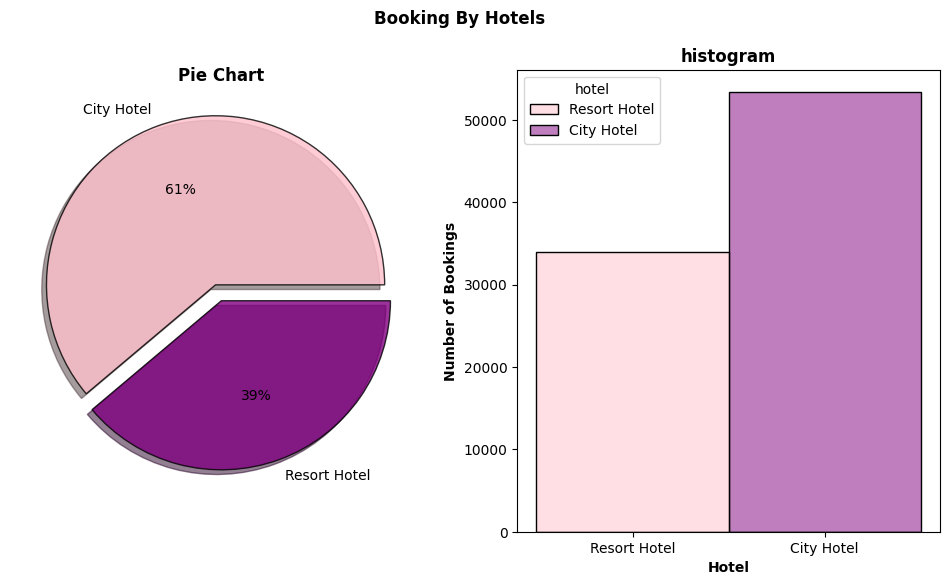

In [21]:
## Hotels

# Pie chart
figure = plt.figure(figsize=(12,6))
plt.suptitle("Booking By Hotels",fontweight = "bold")
plt.subplot(1,2,1)
plt.pie(x=df["hotel"].value_counts(),labels=df["hotel"].value_counts().index,autopct='%.0f%%' , colors = ["pink","purple"] , explode=(0.1,0) , shadow = True,
        wedgeprops = dict(alpha = 0.8 , edgecolor='black'))
plt.title("Pie Chart",fontweight = "bold")

# Histogram
plt.subplot(1,2,2)
sns.histplot(data = df ,  x = "hotel" , hue = df["hotel"] , palette = ["pink","purple"],edgecolor='black' )
plt.xlabel("Hotel",fontweight = "bold")
plt.ylabel("Number of Bookings",fontweight = "bold")
plt.title("histogram",fontweight = "bold")
plt.show()

In [ ]:
Observation : More than 60% of the hotels booked are City Hotels

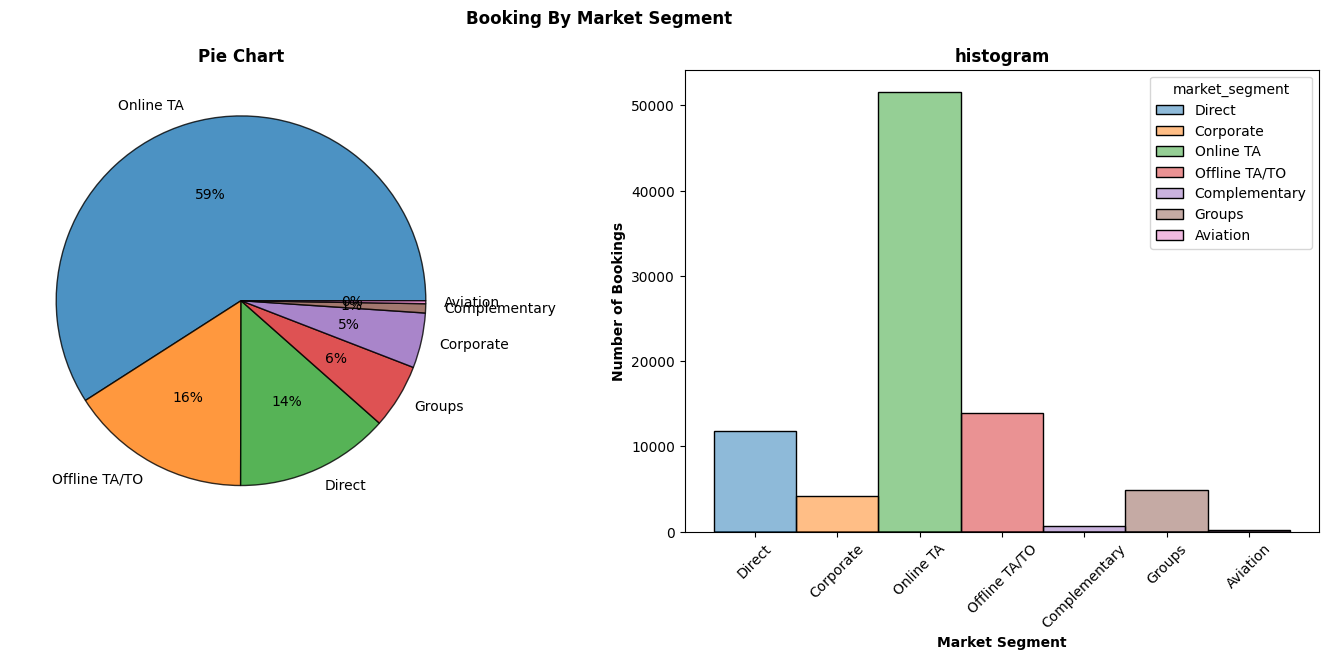

In [22]:
## Market Segment


# Pie chart
figure = plt.figure(figsize=(18,6))
plt.suptitle("Booking By Market Segment",fontweight = "bold")
plt.subplot(1,2,1)
plt.pie(x=df["market_segment"].value_counts(),labels=df["market_segment"].value_counts().index,autopct='%.0f%%',wedgeprops = dict(alpha = 0.8 , edgecolor='black'))
plt.title("Pie Chart",fontweight = "bold")

# Histogram
plt.subplot(1,2,2)
sns.histplot(data = df ,  x = "market_segment" , hue = df["market_segment"] ,edgecolor='black')
plt.xlabel("Market Segment",fontweight = "bold")
plt.ylabel("Number of Bookings",fontweight = "bold")
plt.xticks(rotation = 45)
plt.title("histogram",fontweight = "bold")

plt.show()

In [ ]:
Observation : More than 50% of the bookings were done through Online travel agents

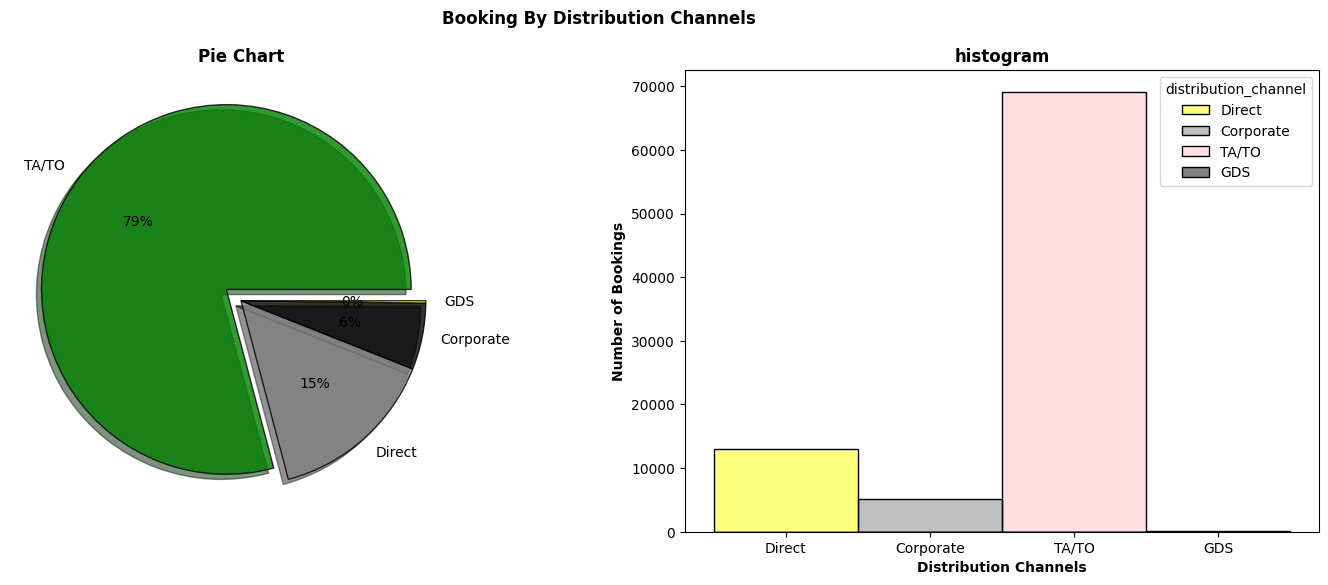

In [23]:
## Distribution Channels

# Pie chart
figure = plt.figure(figsize=(18,6))
plt.suptitle("Booking By Distribution Channels",fontweight = "bold")
plt.subplot(1,2,1)
plt.pie(x=df["distribution_channel"].value_counts(),labels=df["distribution_channel"].value_counts().index,autopct='%.0f%%', 
           explode = (0.1,0,0,0) , shadow = True , colors = ["green","grey","black","yellow"],wedgeprops = dict(alpha = 0.8 , edgecolor='black'))
plt.title("Pie Chart",fontweight = "bold")


# Histogram
plt.subplot(1,2,2)
sns.histplot(data = df ,  x = "distribution_channel" , hue = df["distribution_channel"] , palette = ["yellow","grey","pink","black"] ,edgecolor='black')
plt.xlabel("Distribution Channels",fontweight = "bold")
plt.ylabel("Number of Bookings",fontweight = "bold")
# plt.xticks(rotation = 45)
plt.title("histogram",fontweight = "bold")

plt.show()

In [ ]:
Observation : More than 80% of the bookings were done through travel agents/operators.

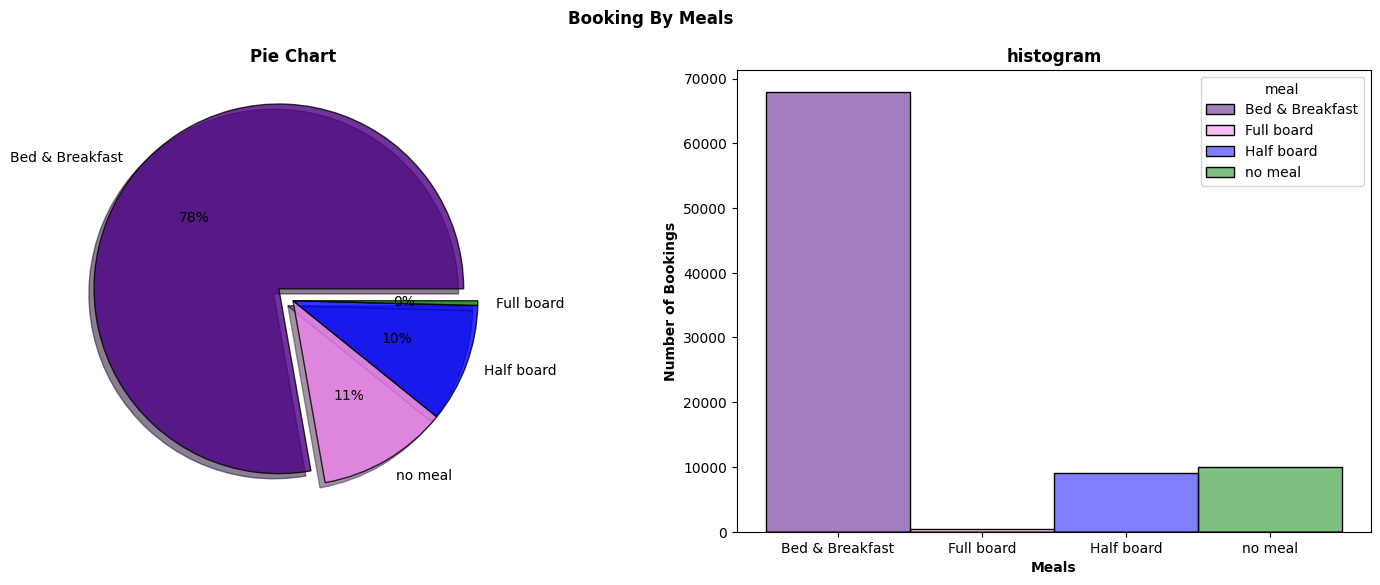

In [24]:
## Meals

# Pie chart
figure = plt.figure(figsize=(18,6))
plt.suptitle("Booking By Meals",fontweight = "bold")
plt.subplot(1,2,1)
plt.pie(x=df["meal"].value_counts(),labels=df["meal"].value_counts().index,autopct='%.0f%%', 
           explode = (0.1,0,0,0) , shadow = True , colors = ["indigo","violet","blue","green"],wedgeprops = dict(alpha = 0.8 , edgecolor='black'))
plt.title("Pie Chart",fontweight = "bold")


# Histogram
plt.subplot(1,2,2)
sns.histplot(data = df ,  x = "meal" , hue = df["meal"] , palette = ["indigo","violet","blue","green"] ,edgecolor='black' )
plt.xlabel("Meals",fontweight = "bold")
plt.ylabel("Number of Bookings",fontweight = "bold")
# plt.xticks(rotation = 45)
plt.title("histogram",fontweight = "bold")

plt.show()

In [ ]:
Observation : More than 70% of the guests book Bed & Breakfast and almost 90% of the total guests book meals.

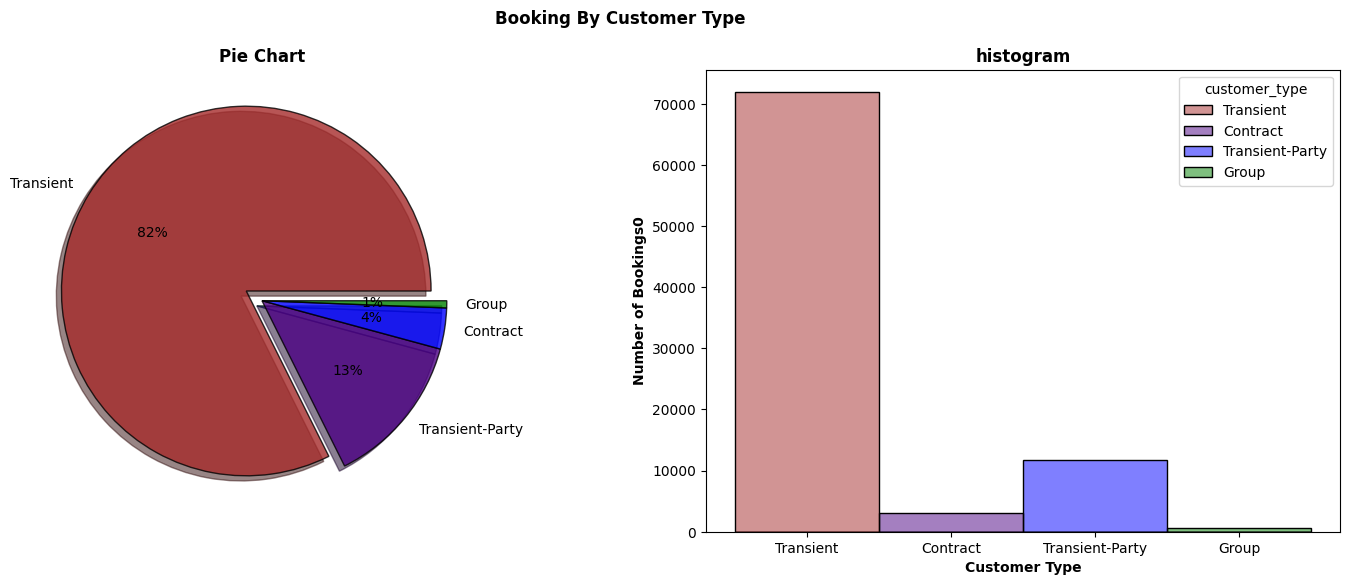

In [25]:
## Customer Type

# Pie chart
figure = plt.figure(figsize=(18,6))
plt.suptitle("Booking By Customer Type",fontweight = "bold")
plt.subplot(1,2,1)
plt.pie(x=df["customer_type"].value_counts(),labels=df["customer_type"].value_counts().index,autopct='%.0f%%', 
           explode = (0.1,0,0,0) , shadow = True , colors = ["brown","indigo","blue","green"],wedgeprops = dict(alpha = 0.8 , edgecolor='black'))
plt.title("Pie Chart",fontweight = "bold")


# Histogram
plt.subplot(1,2,2)
sns.histplot(data = df ,  x = "customer_type" , hue = df["customer_type"] , palette = ["brown","indigo","blue","green"] ,edgecolor='black')
plt.xlabel("Customer Type",fontweight = "bold")
plt.ylabel("Number of Bookings0",fontweight = "bold")
# plt.xticks(rotation = 45)
plt.title("histogram",fontweight = "bold")

plt.show()


In [ ]:
Observation : The majority of the bookings are not part of a group or contract.

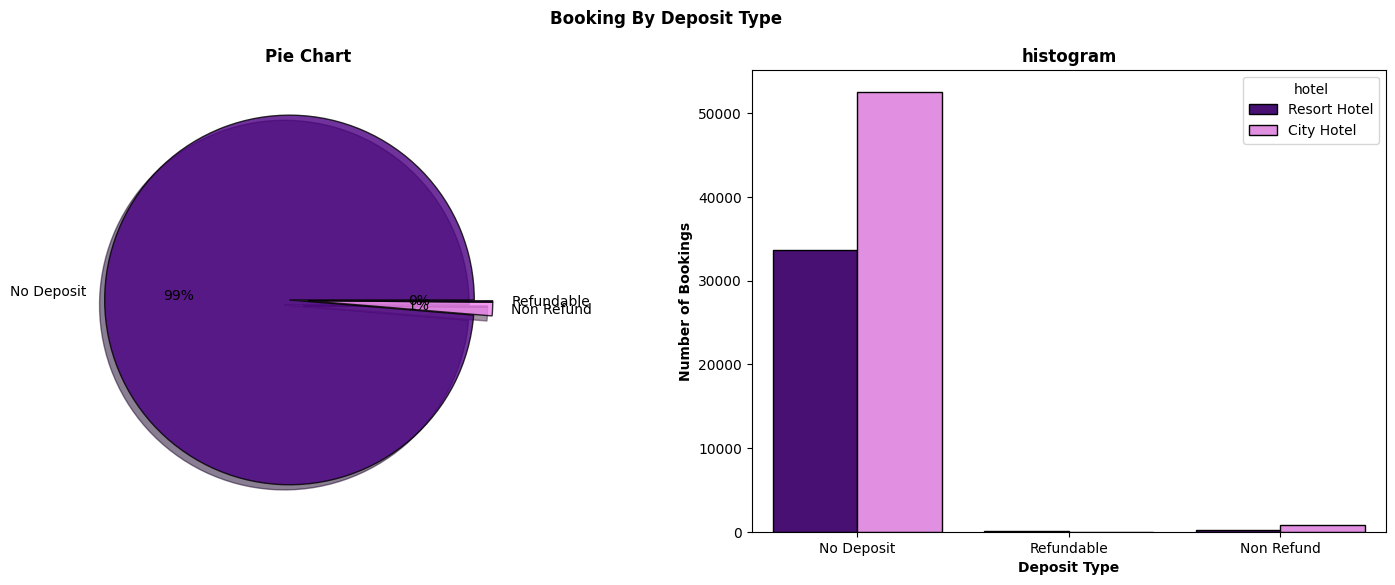

In [26]:
## Deposit Type

# Pie chart
figure = plt.figure(figsize=(18,6))
plt.suptitle("Booking By Deposit Type",fontweight = "bold")
plt.subplot(1,2,1)
plt.pie(x=df["deposit_type"].value_counts(),labels=df["deposit_type"].value_counts().index,autopct='%.0f%%', 
           explode = (0.1,0,0) , shadow = True , colors = ["indigo","violet"],wedgeprops = dict(alpha = 0.8 , edgecolor='black'))
plt.title("Pie Chart",fontweight = "bold")


# Histogram
plt.subplot(1,2,2)
sns.countplot(data = df ,  x = "deposit_type" , hue = df["hotel"] , palette = ["indigo","violet"],edgecolor='black' )
plt.xlabel("Deposit Type",fontweight = "bold")
plt.ylabel("Number of Bookings",fontweight = "bold")
# plt.xticks(rotation = 45)
plt.title("histogram",fontweight = "bold")

plt.show()

In [ ]:
Observation : The majority of the guests made no deposit

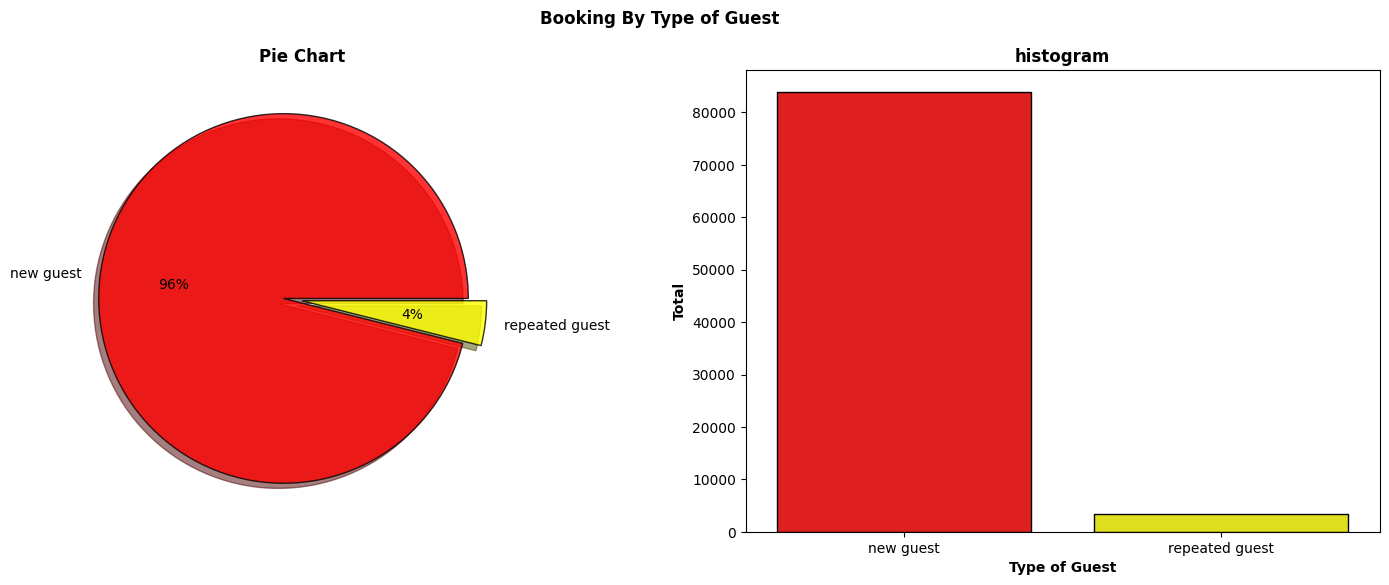

In [28]:
## Type of Guest


# Pie chart
figure = plt.figure(figsize=(18,6))
plt.suptitle("Booking By Type of Guest",fontweight = "bold")
plt.subplot(1,2,1)
plt.pie(x=df["is_repeated_guest"].value_counts(),labels=df["is_repeated_guest"].value_counts().index,autopct='%.0f%%', 
           explode = (0.1,0) , shadow = True , colors = ["red","yellow"],wedgeprops = dict(alpha = 0.8 , edgecolor='black'))
plt.title("Pie Chart",fontweight = "bold")


# Histogram
plt.subplot(1,2,2)
sns.barplot(x= df["is_repeated_guest"].value_counts().index , y = df["is_repeated_guest"].value_counts().values , palette = ["red","yellow"] ,edgecolor='black')
# plt.xticks(rotation = 45)
plt.title("histogram",fontweight = "bold")
plt.xlabel("Type of Guest",fontweight = "bold")
plt.ylabel("Total",fontweight = "bold")

plt.show()



In [ ]:
Observation : Almost all of the guests are new guests.

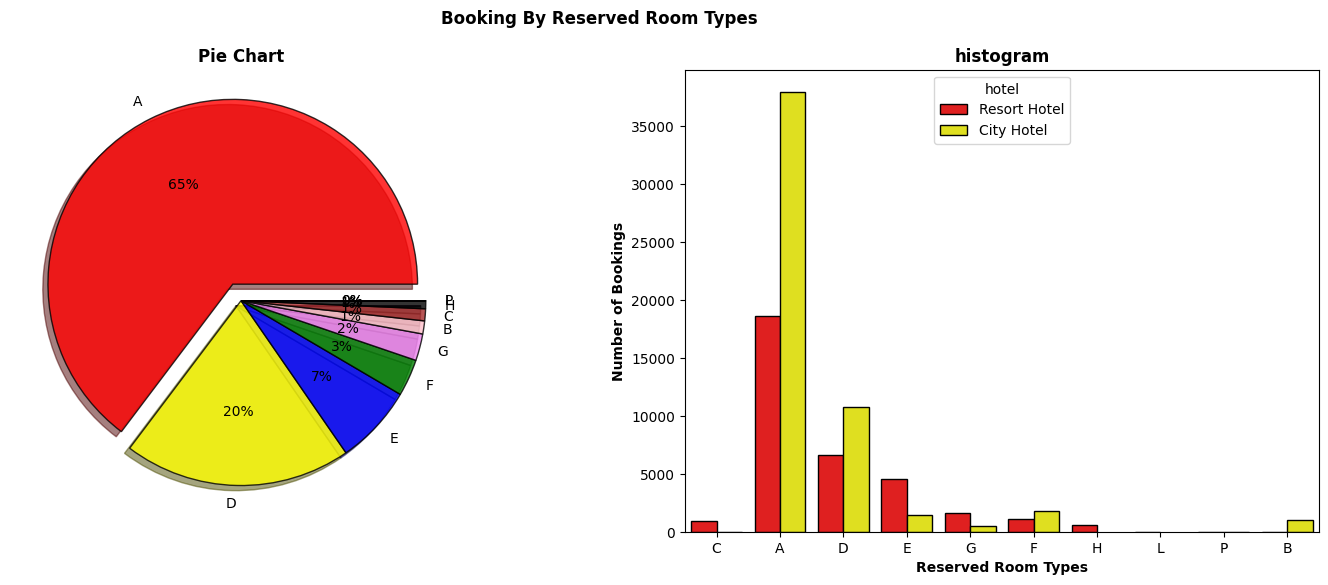

In [29]:
## Reserved Room Types


# Pie chart
figure = plt.figure(figsize=(18,6))
plt.suptitle("Booking By Reserved Room Types",fontweight = "bold")
plt.subplot(1,2,1)
plt.pie(x=df["reserved_room_type"].value_counts(),labels=df["reserved_room_type"].value_counts().index,autopct='%.0f%%', 
           explode = (0.1,0,0,0,0,0,0,0,0,0), shadow = True , colors = ["red","yellow","blue","green","violet","pink","brown","black","grey","indigo"],
       wedgeprops = dict(alpha = 0.8 , edgecolor='black'))
plt.title("Pie Chart",fontweight = "bold")


# Histogram
plt.subplot(1,2,2)
sns.countplot(data = df ,  x = "reserved_room_type" , hue = df["hotel"] , palette = ["red","yellow"] ,edgecolor='black' )
plt.xlabel("Reserved Room Types",fontweight = "bold")
plt.ylabel("Number of Bookings",fontweight = "bold")
# plt.xticks(rotation = 45)
plt.title("histogram",fontweight = "bold")

plt.show()



In [ ]:
Observation : Most of the guests reserved room A, a few reserved rooms D & E and the demand for the rest are minimal.

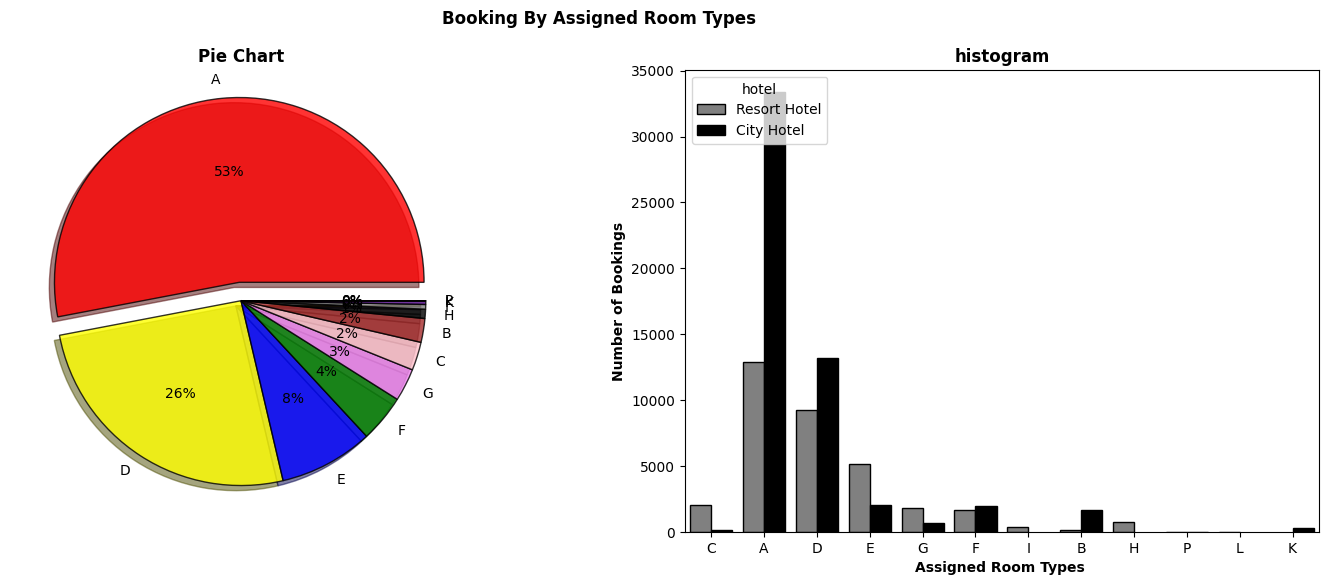

In [30]:
## Assigned Room Types 

# Pie chart
figure = plt.figure(figsize=(18,6))
plt.suptitle("Booking By Assigned Room Types",fontweight = "bold")
plt.subplot(1,2,1)
plt.pie(x=df["assigned_room_type"].value_counts(),labels=df["assigned_room_type"].value_counts().index,autopct='%.0f%%', 
           explode = (0.1,0,0,0,0,0,0,0,0,0,0,0), shadow = True , colors = ["red","yellow","blue","green","violet","pink","brown","black","grey","indigo"],
       wedgeprops = dict(alpha = 0.8 , edgecolor='black'))
plt.title("Pie Chart",fontweight = "bold")


# Histogram
plt.subplot(1,2,2)
sns.countplot(data = df ,  x = "assigned_room_type" , hue = df["hotel"] , palette = ["grey","black"],edgecolor='black' )
plt.xlabel("Assigned Room Types ",fontweight = "bold")
plt.ylabel("Number of Bookings",fontweight = "bold")
# plt.xticks(rotation = 45)
plt.title("histogram",fontweight = "bold")

plt.show()

In [ ]:
Observation : Most of the guests are assigned room A, a few were assigned rooms D & E and the rests are minimal.

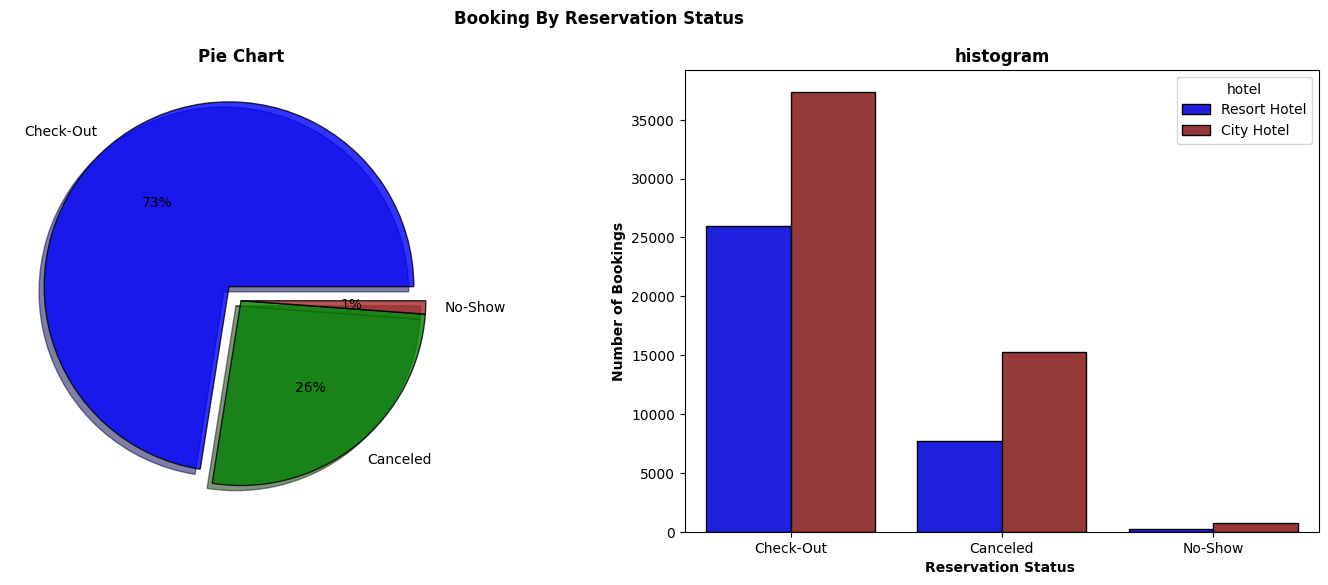

In [31]:
## Reservation Status


# Pie chart
figure = plt.figure(figsize=(18,6))
plt.suptitle("Booking By Reservation Status",fontweight = "bold")
plt.subplot(1,2,1)
plt.pie(x=df["reservation_status"].value_counts(),labels=df["reservation_status"].value_counts().index,autopct='%.0f%%', 
           explode = (0.1,0,0), shadow = True , colors = ["blue","green","brown"],wedgeprops = dict(alpha = 0.8 , edgecolor='black'))
plt.title("Pie Chart",fontweight = "bold")


# Histogram
plt.subplot(1,2,2)
sns.countplot(data = df ,  x = "reservation_status" , hue = df["hotel"] , palette = ["blue","brown"] ,edgecolor='black' )
plt.xlabel("Reservation Status ",fontweight = "bold")
plt.ylabel("Number of Bookings",fontweight = "bold")
# plt.xticks(rotation = 45)
plt.title("histogram",fontweight = "bold")

plt.show()

In [ ]:
Observation : Most of the guests checked in and already departed.

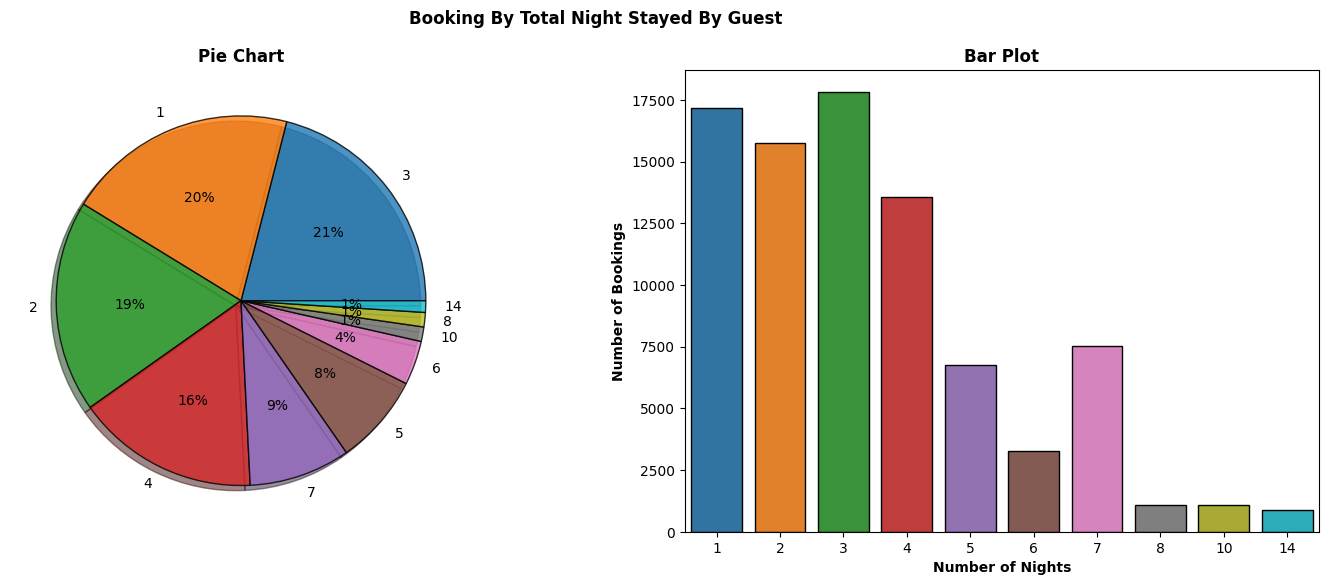

In [32]:
## Total Night Stayed 
 

# Pie chart
figure = plt.figure(figsize=(18,6))
plt.suptitle("Booking By Total Night Stayed By Guest ",fontweight = "bold")
plt.subplot(1,2,1)
plt.pie(x=df["total_nights"].value_counts().head(10),labels=df["total_nights"].value_counts().head(10).index,autopct='%.0f%%', 
            shadow = True ,wedgeprops = dict(alpha = 0.8 , edgecolor='black') )
plt.title("Pie Chart",fontweight = "bold")

# Bar Plot
plt.subplot(1,2,2)
sns.barplot(x= df["total_nights"].value_counts().head(10).index , y = df["total_nights"].value_counts().head(10).values ,edgecolor='black')
plt.xlabel("Number of Nights",fontweight = "bold")
plt.ylabel("Number of Bookings",fontweight = "bold")
# plt.xticks(rotation = 45)
plt.title("Bar Plot",fontweight = "bold")


plt.show()

In [ ]:
Observation : The most popular stay duration for the hotels is three nights.

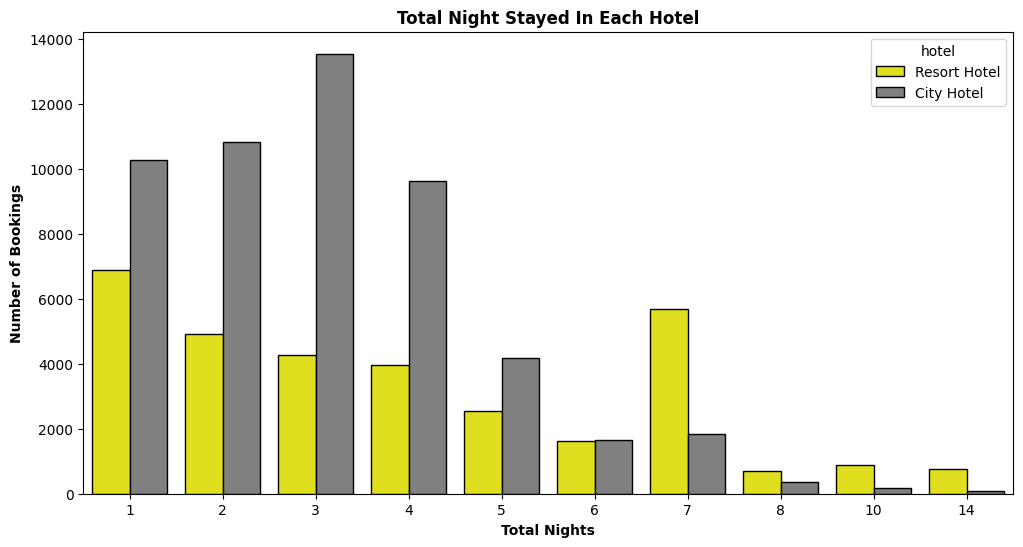

In [33]:
## Total Night Stayed In Each Hotel

TN = list(df["total_nights"].value_counts().head(10).index)
data = df[df["total_nights"].isin(TN)]

# Count Plot
plt.figure(figsize=(12,6))
sns.countplot(x= data["total_nights"],hue=data["hotel"], palette =["yellow","grey"],edgecolor='black')
plt.xlabel("Total Nights",fontweight = "bold")
plt.ylabel("Number of Bookings",fontweight = "bold")
# plt.xticks(rotation = 45)
plt.title("Total Night Stayed In Each Hotel",fontweight = "bold")


plt.show()

In [ ]:
Observation : The most popular stay duration in Resort Hotel is one, seven, two, three and four nights.
The most popular stay duration in City Hotel is three, two, one and four nights.

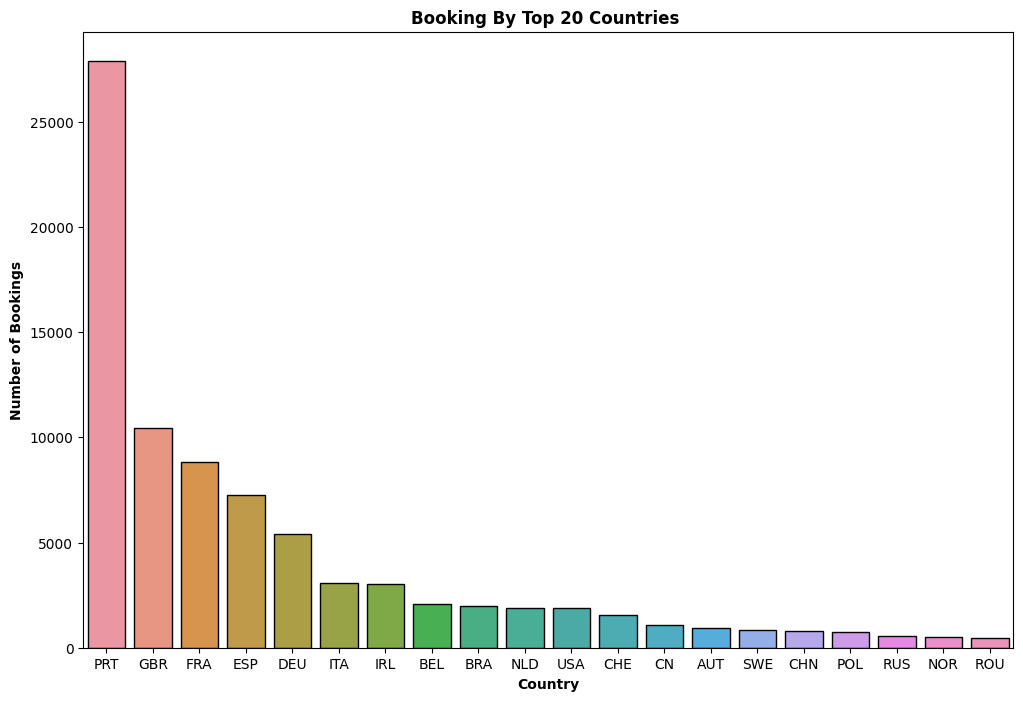

In [34]:
## Top 20 Countries

# Bar Plot
plt.figure(figsize=(12,8))
sns.barplot(x= df["country"].value_counts().head(20).index , y = df["country"].value_counts().head(20).values ,edgecolor='black' )
plt.xlabel("Country",fontweight = "bold")
plt.ylabel("Number of Bookings",fontweight = "bold")
# plt.xticks(rotation = 45)
plt.title("Booking By Top 20 Countries ",fontweight = "bold")

plt.show()



In [ ]:
Observation : Portugal has a higher number of bookings than any other country.

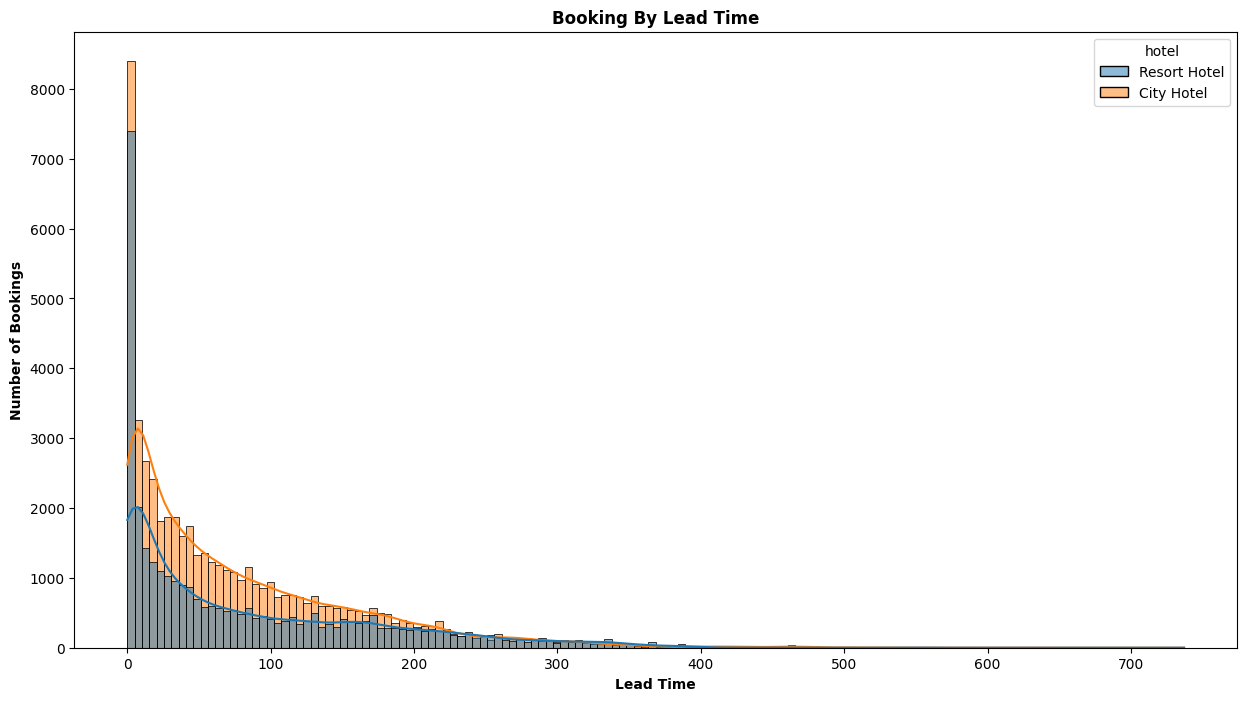

In [35]:
## Lead Time

# Bar Plot
plt.figure(figsize=(15,8))
sns.histplot(data = df , x= "lead_time", hue= "hotel",kde=True ,edgecolor='black')
plt.xlabel("Lead Time",fontweight = "bold")
plt.ylabel("Number of Bookings",fontweight = "bold")
# plt.xticks(rotation = 45)
plt.title("Booking By Lead Time",fontweight = "bold")

plt.show()


In [ ]:
Observation : Most bookings are done within 100 days before checking in the hotel.

In [ ]:
# Relationships

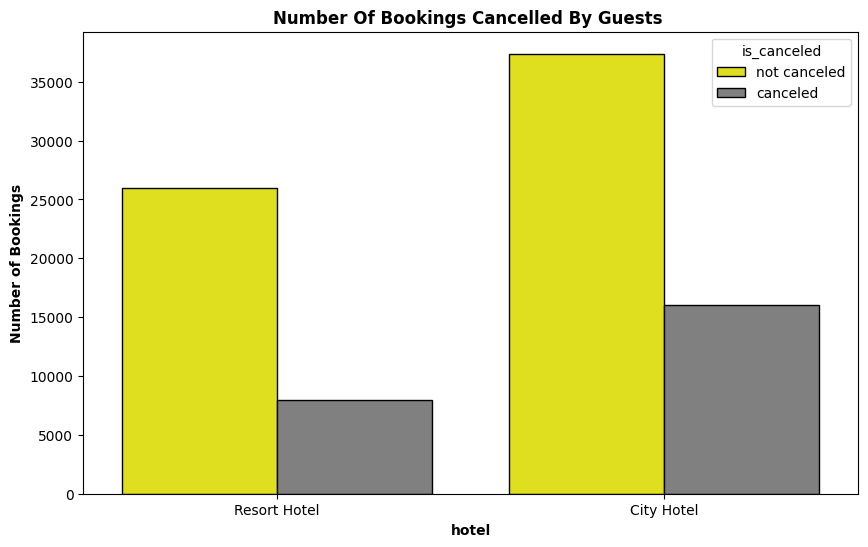

In [36]:
## Number Of Bookings Cancelled By Guests 

# Histogram
plt.figure(figsize=(10,6))
sns.countplot(data = df , x = "hotel" ,  hue = "is_canceled" ,  palette =["yellow","grey"],edgecolor='black')
plt.xlabel("hotel",fontweight = "bold")
plt.ylabel("Number of Bookings",fontweight = "bold")
# plt.xticks(rotation = 45)
plt.title("Number Of Bookings Cancelled By Guests ",fontweight = "bold")

plt.show()

In [ ]:
Observation : Guests in Resort hotels cancel their bookings less often than guests in City hotels.

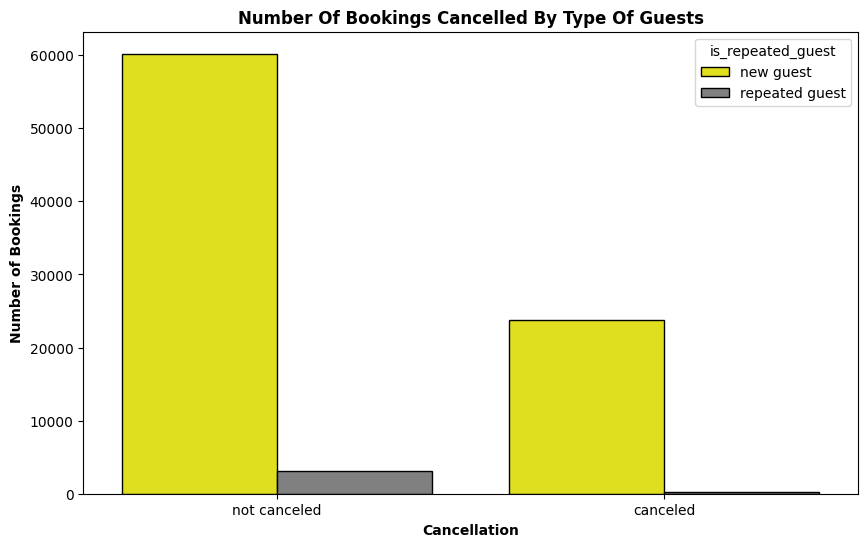

In [37]:
## Number Of Bookings Cancelled By Type Of Guests(Repeated/New Guests)

# Histogram
plt.figure(figsize=(10,6))
sns.countplot(data = df , x = "is_canceled" ,  hue = "is_repeated_guest" ,  palette =["yellow","grey"],edgecolor='black')
plt.xlabel("Cancellation",fontweight = "bold")
plt.ylabel("Number of Bookings",fontweight = "bold")
# plt.xticks(rotation = 45)
plt.title("Number Of Bookings Cancelled By Type Of Guests",fontweight = "bold")

plt.show()

In [ ]:
Observation : Repeated guests cancel their bookings less than new guests.

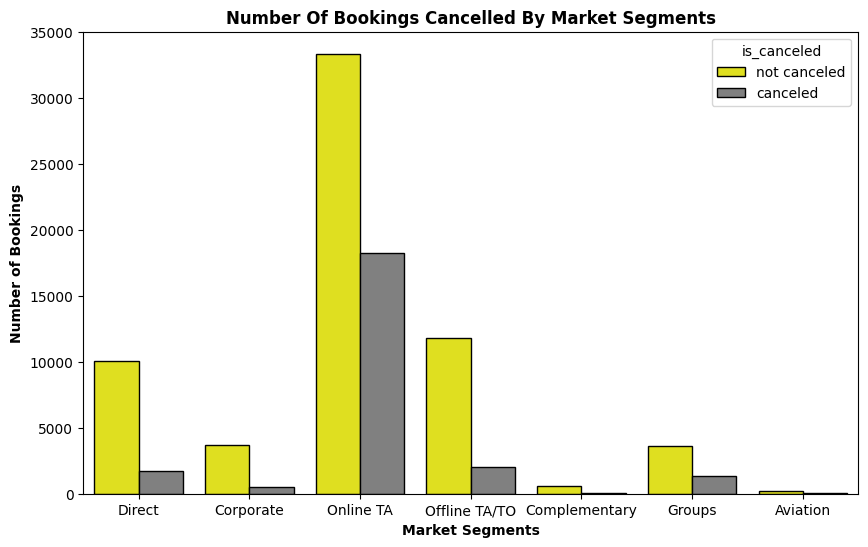

In [38]:
##  Number Of Bookings Cancelled By Market Segments

# Histogram
plt.figure(figsize=(10,6))
sns.countplot(data = df , x = "market_segment" ,  hue = "is_canceled" ,  palette =["yellow","grey"],edgecolor='black')
plt.xlabel("Market Segments",fontweight = "bold")
plt.ylabel("Number of Bookings",fontweight = "bold")
# plt.xticks(rotation = 45)
plt.title("Number Of Bookings Cancelled By Market Segments",fontweight = "bold")

plt.show()

In [ ]:
Observation : Online travel agents, offline travel agents/operators and the direct segment have high cancellation rates compared to the rest.

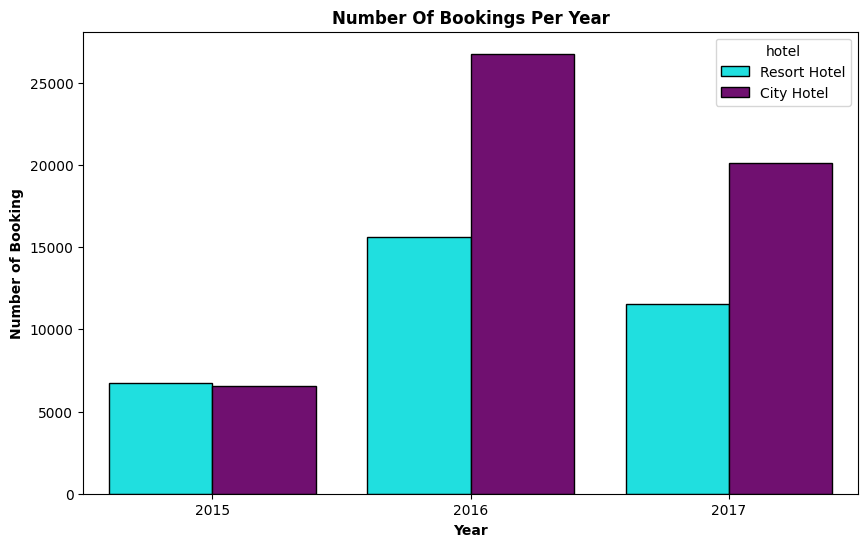

In [39]:
## Number Of Bookings Per Year

# Histogram
plt.figure(figsize=(10,6))
sns.countplot(data = df , x = "arrival_date_year" ,  hue = "hotel" ,  palette =["cyan","purple"],edgecolor='black')
plt.xlabel("Year",fontweight = "bold")
plt.ylabel("Number of Booking",fontweight = "bold")
# plt.xticks(rotation = 45)
plt.title("Number Of Bookings Per Year",fontweight = "bold")

plt.show()

In [ ]:
Observation : Both resort and city hotels had their highest bookings in 2016. City hotels have higher bookings in 2017 compared to resort hotels.
Both had almost the same number of bookings in 2015.

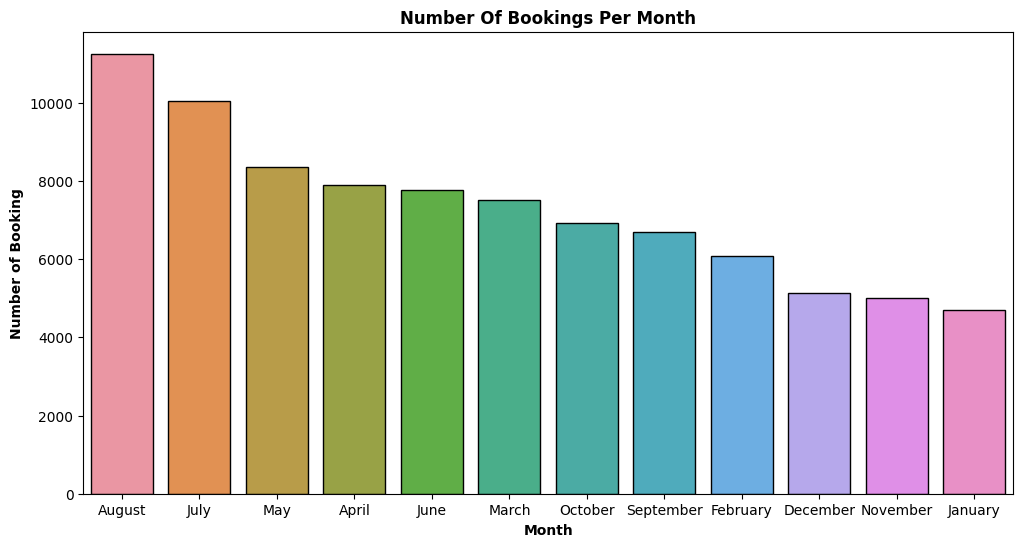

In [40]:
## Number Of Bookings Per Month


# Histogram
plt.figure(figsize=(12,6))
sns.barplot(x = df["arrival_date_month"].value_counts().index , y = df["arrival_date_month"].value_counts().values,edgecolor='black')
plt.xlabel("Month",fontweight = "bold")
plt.ylabel("Number of Booking",fontweight = "bold")
# plt.xticks(rotation = 45)
plt.title("Number Of Bookings Per Month",fontweight = "bold")

plt.show()

In [ ]:
Observation :  January , November, December and February are the months having the least books.
August and July  are the months having the highest bookings.

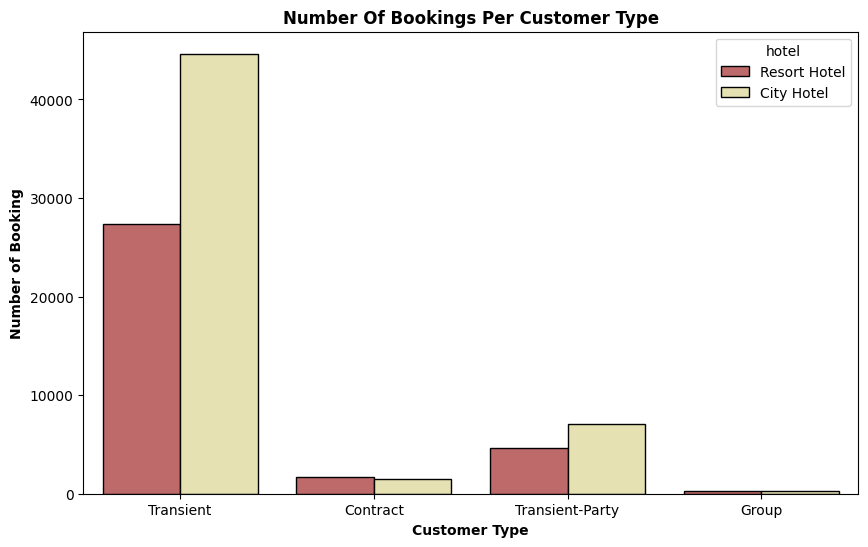

In [41]:
## Number Of Bookings Per Customer Type

# Histogram
plt.figure(figsize=(10,6))
sns.countplot(data = df , x = "customer_type" ,  hue = "hotel" ,  palette =["indianred","palegoldenrod"],edgecolor='black')
plt.xlabel("Customer Type",fontweight = "bold")
plt.ylabel("Number of Booking",fontweight = "bold")
# plt.xticks(rotation = 45)
plt.title("Number Of Bookings Per Customer Type",fontweight = "bold")

plt.show()

In [ ]:
Observation : Transient and Transient-party guests mostly book City hotels while contract and
group guests almost have the same number of bookings in resort and city hotels.

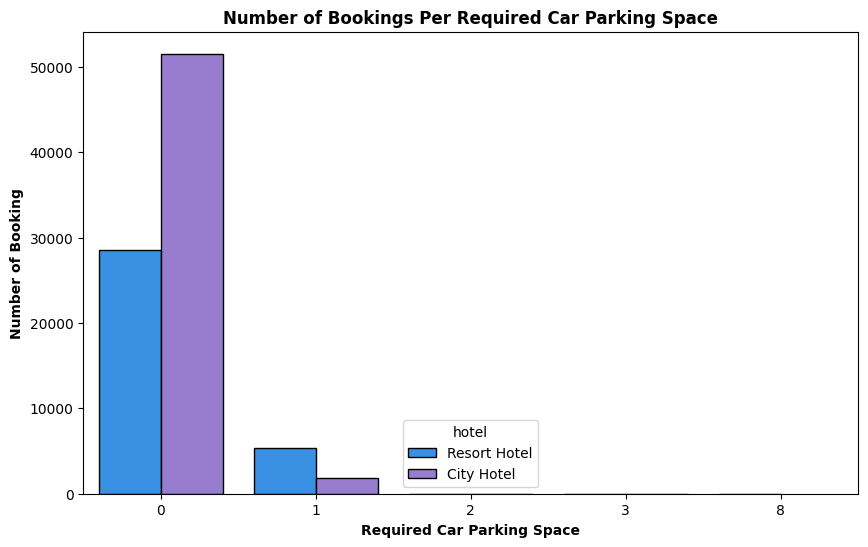

In [42]:
## Bookings Per Required Car Space


# Histogram
plt.figure(figsize=(10,6))
sns.countplot(data = df , x = "required_car_parking_spaces" ,  hue = "hotel" ,  palette =["dodgerblue","mediumpurple"] , edgecolor='black')
plt.xlabel("Required Car Parking Space",fontweight = "bold")
plt.ylabel("Number of Booking",fontweight = "bold")
# plt.xticks(rotation = 45)
plt.title("Number of Bookings Per Required Car Parking Space",fontweight = "bold")

plt.show()

In [ ]:
Observation : The majority of the guests don’t need car parking spaces while few guests need parking spaces.

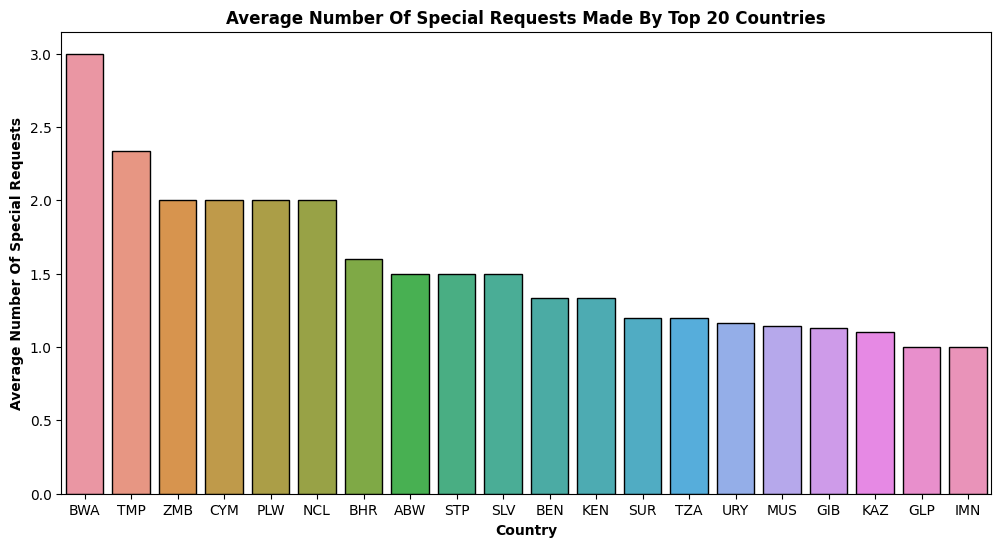

In [43]:
## Average Number Of Special Requests Made By Top 20 Countries

data = df.groupby("country")["total_of_special_requests"].mean().sort_values(ascending=False)[:20]


# Histogram
plt.figure(figsize=(12,6))
sns.barplot(x = data.index , y = data ,edgecolor='black')
plt.xlabel("Country",fontweight = "bold")
plt.ylabel("Average Number Of Special Requests",fontweight = "bold")
# plt.xticks(rotation = 45)
plt.title("Average Number Of Special Requests Made By Top 20 Countries",fontweight = "bold")

plt.show()

In [ ]:
Observation : Botswana has the highest number of special requests among the countries.

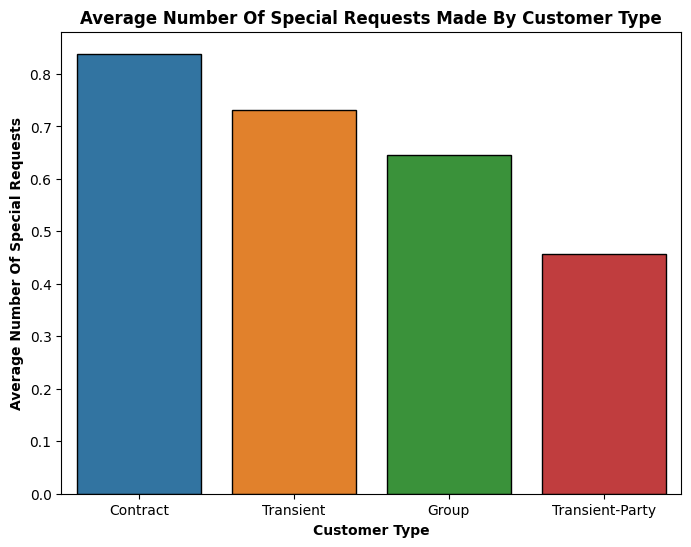

In [44]:
## Average Number Of Special Requests Made By Customer Type

data = df.groupby("customer_type")["total_of_special_requests"].mean().sort_values(ascending=False)


# Histogram
plt.figure(figsize=(8,6))
sns.barplot(x = data.index , y = data ,edgecolor='black')
plt.xlabel("Customer Type",fontweight = "bold")
plt.ylabel("Average Number Of Special Requests",fontweight = "bold")
# plt.xticks(rotation = 45)
plt.title("Average Number Of Special Requests Made By Customer Type",fontweight = "bold")

plt.show()


In [ ]:
Observation : Contract guests have the highest number of special requests while transient-party guests have the lowest number of special requests.

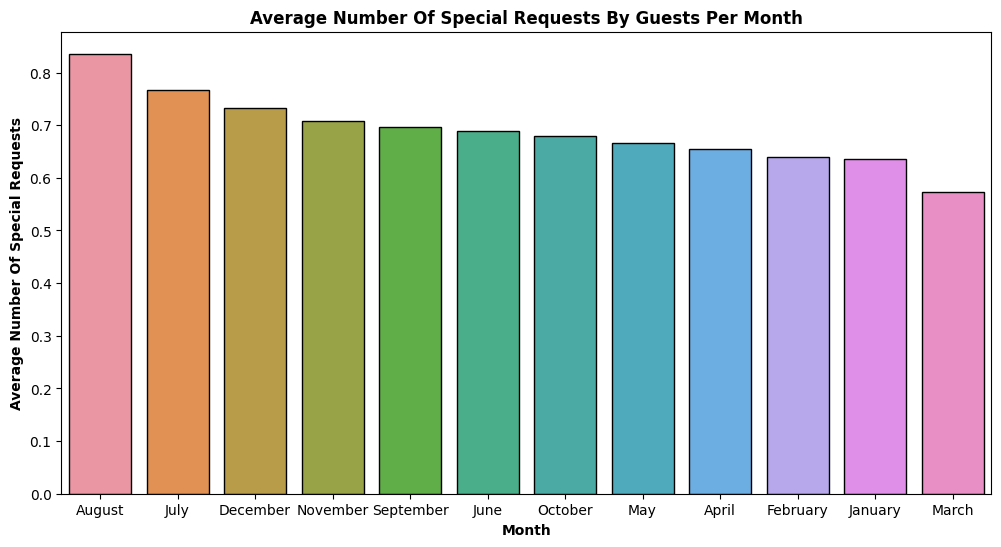

In [45]:
## Average Number Of Special Requests Made Per Guests Across Months

data = df.groupby("arrival_date_month")["total_of_special_requests"].mean().sort_values(ascending=False)


# Histogram
plt.figure(figsize=(12,6))
sns.barplot(x = data.index , y = data ,edgecolor='black')
plt.xlabel("Month",fontweight = "bold")
plt.ylabel("Average Number Of Special Requests",fontweight = "bold")
# plt.xticks(rotation = 45)
plt.title("Average Number Of Special Requests By Guests Per Month",fontweight = "bold")

plt.show()
 


In [ ]:
Observation : An almost similar number of special requests were made by guests across months but slightly more were made in August,
July and December.

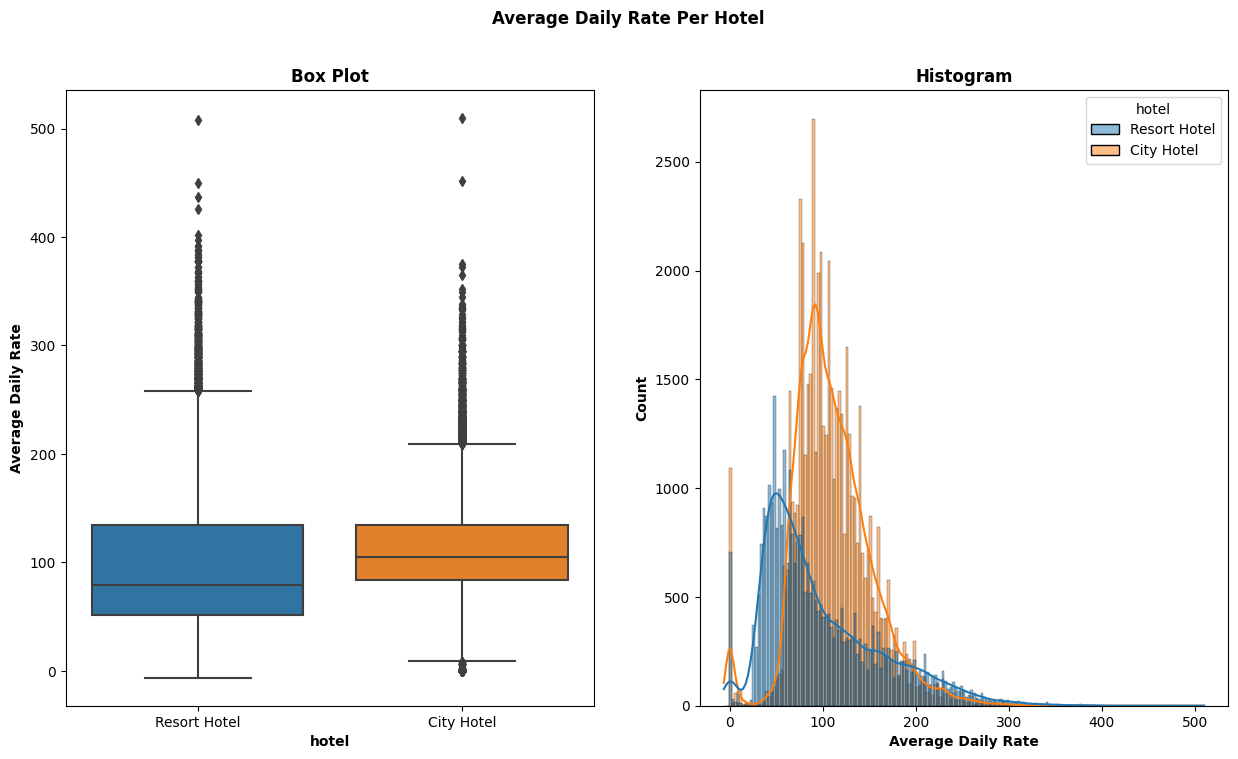

count    87372.000000
mean       106.288035
std         52.006694
min         -6.380000
25%         72.000000
50%         98.100000
75%        134.000000
max        510.000000
Name: adr, dtype: float64

In [46]:
## Average Daily Rate Per Hotel

df.drop(df[df["adr"] == 5400].index,axis = 0,inplace=True)

plt.figure(figsize=(15,8))
plt.suptitle("Average Daily Rate Per Hotel",fontweight = "bold")

# BoxPlot
plt.subplot(1,2,1)
sns.boxplot(data = df ,  x = "hotel"  , y = "adr" )
plt.xlabel("hotel",fontweight = "bold")
plt.ylabel("Average Daily Rate",fontweight = "bold")
# plt.xticks(rotation = 45)
plt.title("Box Plot",fontweight = "bold")

# Histogram
plt.subplot(1,2,2)
sns.histplot(data = df ,  x = "adr"  , hue = "hotel" , kde=True )
plt.xlabel("Average Daily Rate",fontweight = "bold")
plt.ylabel("Count",fontweight = "bold")
# plt.xticks(rotation = 45)
plt.title("Histogram",fontweight = "bold")


plt.show()

df["adr"].describe()

In [ ]:
Observation : The average daily rate of Resort hotels is more spread than City hotels.

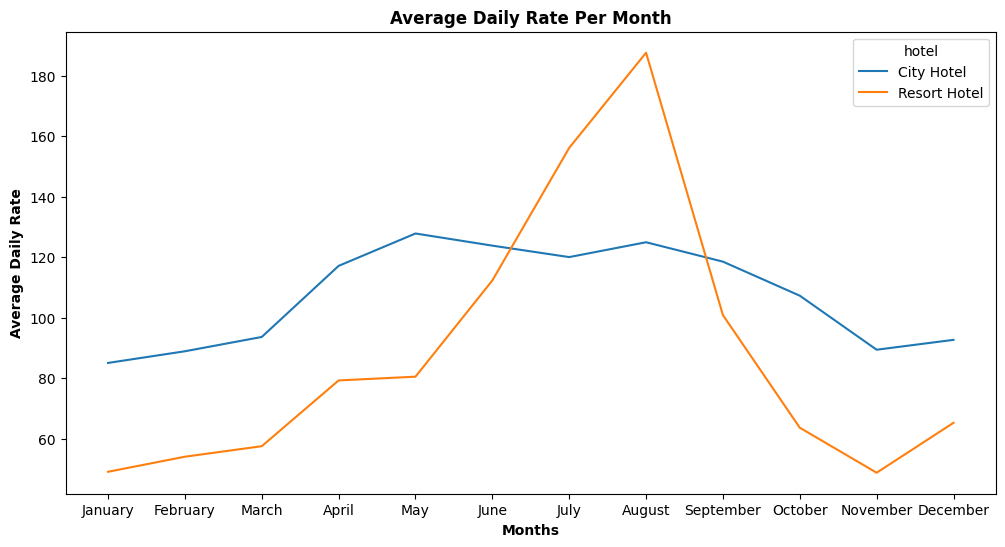

In [47]:
## Average Daily Rate Per Month

df.drop(df[df["adr"] == 5400].index,axis = 0,inplace=True)

months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October",
"November", "December"]

data = df.groupby(["hotel","arrival_date_month"])["adr"].mean().reset_index()
data["arrival_date_month"] = pd.Categorical(data["arrival_date_month"],categories = months , ordered = True)
data.sort_values("arrival_date_month", inplace = True)

# Histogram

plt.figure(figsize=(12,6))
sns.lineplot(data = data ,  x = "arrival_date_month"  , y = "adr" , hue = "hotel" )
plt.xlabel("Months",fontweight = "bold")
plt.ylabel("Average Daily Rate",fontweight = "bold")
# plt.xticks(rotation = 45)
plt.title("Average Daily Rate Per Month",fontweight = "bold")

plt.show()

In [ ]:
Observation : The average daily rate for both hotels is higher mid-year. City hotels have higher daily rate beginning and 
the start of the year compared to Resort hotels.

In [48]:
## Drop Some Features

df_sub = df.drop(['arrival_date_week_number', 'arrival_date_day_of_month', 'previous_cancellations',
'previous_bookings_not_canceled', 'booking_changes', 'reservation_status_date', 'agent', 'company', 'days_in_waiting_list', 
'adults', 'babies', 'children'], axis = 1)

In [49]:
## Correlation Matrix

corr_matrix = round(df_sub.corr(),3)

corr_matrix

,lead_time,arrival_date_year,stays_in_weekend_nights,stays_in_week_nights,adr,required_car_parking_spaces,total_of_special_requests,total_nights
lead_time,1.000,0.139,0.235,0.310,0.025,-0.087,0.034,0.318
arrival_date_year,0.139,1.000,0.005,0.004,0.187,-0.040,0.064,0.005
stays_in_weekend_nights,0.235,0.005,1.000,0.556,0.042,-0.043,0.032,0.786
stays_in_week_nights,0.310,0.004,0.556,1.000,0.057,-0.044,0.038,0.951
adr,0.025,0.187,0.042,0.057,1.000,0.042,0.147,0.058
required_car_parking_spaces,-0.087,-0.040,-0.043,-0.044,0.042,1.000,0.048,-0.049
total_of_special_requests,0.034,0.064,0.032,0.038,0.147,0.048,1.000,0.040
total_nights,0.318,0.005,0.786,0.951,0.058,-0.049,0.040,1.000


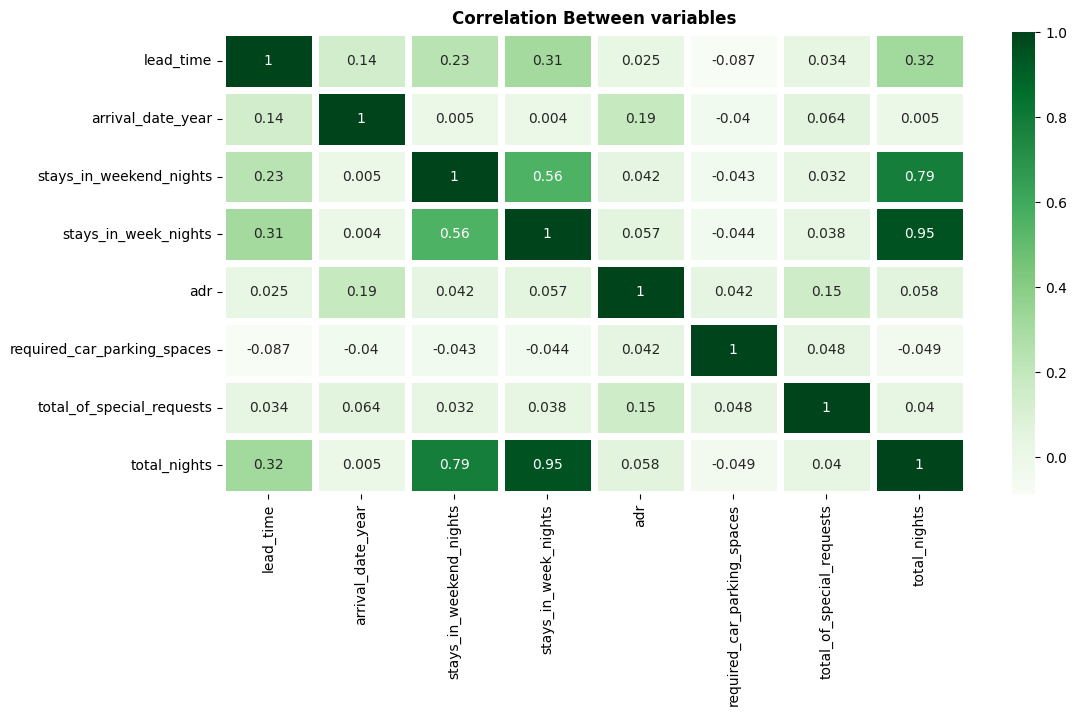

In [50]:
## Heat Map

plt.figure(figsize=(12,6))
sns.heatmap(data = corr_matrix , annot = True, cmap= "Greens",linewidth = 5)
plt.title("Correlation Between variables" ,fontweight = "bold" )
plt.show()